In [1]:
import glob, pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

### Load all results from path (in csv format)

In [2]:
path = r'../artifacts/' # path to results
all_files = glob.glob(path + "/*.csv") # get all csv files

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None) # read each csv
    li.append(df) # append to list

results = pd.concat(li, axis=0, ignore_index=True) # combine into one dataframe
results.loc[(results.Vectorizer=='w2c'),'Vectorizer'] = 'word2vec'

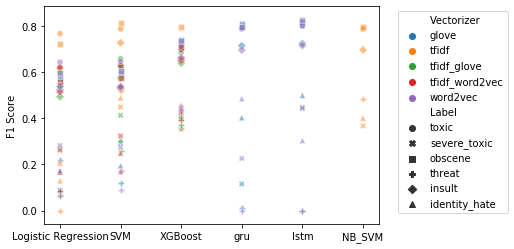

In [3]:
ax = sns.scatterplot(data = results,
                x = 'model',
                y = 'F1',
                hue = 'Vectorizer',
                style = 'Label',
                alpha = 0.5)

ax.set_ylabel('F1 Score')  # y label
ax.set_xlabel('')            # title
plt.legend(bbox_to_anchor=(1.4,1), loc = 'upper right')
plt.show()

### Summary results (F1 SCORE) by model

In [4]:
results_summary_bymodel = results.groupby(['model','Vectorizer']).agg({'F1':['mean','median','std','min','max']})
results_summary_bymodel.columns = ['Mean', 'Median', 'Std', 'Min', 'Max']
results_summary_bymodel = results_summary_bymodel.reset_index()

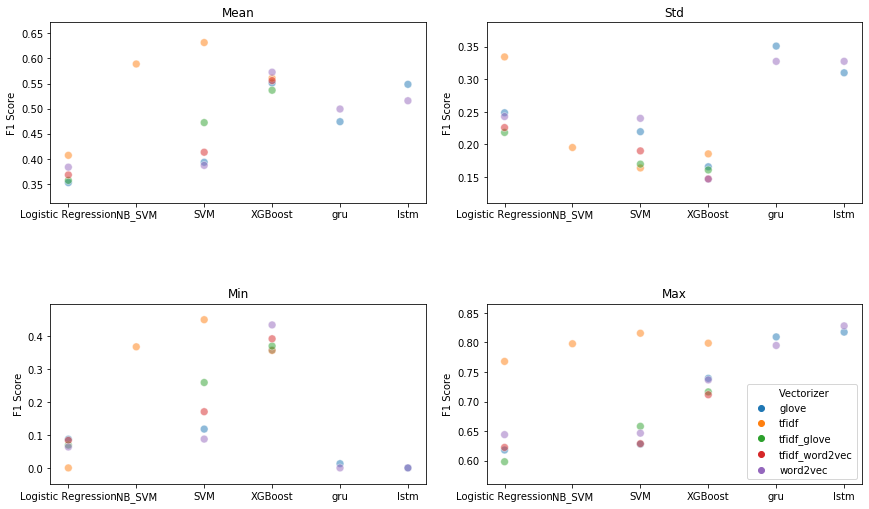

In [5]:
## PLOT MEAN F1 SCORE
cols_to_plot = ['Mean','Std','Min','Max']
fig, axes = plt.subplots(2,2,figsize=(12,7))
fig.tight_layout(h_pad=8,w_pad=3)
for n,c in enumerate(cols_to_plot):
    ax = axes[n//2][n%2]
    sns.scatterplot(data = results_summary_bymodel,
                        x = 'model',
                        y = c,
                        hue = 'Vectorizer',
                        ax = ax,
                        s = 60,
                        alpha = 0.5)

    ax.set_ylabel('F1 Score')  # y label
    ax.set_xlabel('')
    ax.set_title(c)            # title
    ax.get_legend().set_visible(False)
axes[1][1].legend()
plt.show()